# Plotting routine for the Sep22 Event

In [63]:
%load_ext autoreload

%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pickle as p

import datetime as datetime
from datetime import timedelta
import seaborn as sns
import pandas as pd
import os
import copy as cp

import py3dcore_h4c as py3dcore_h4c

import py3dcore_h4c.fluxplot as fp

import warnings
warnings.filterwarnings('ignore')

import logging

logging.basicConfig(level=logging.INFO)
logging.getLogger("heliosat.spice").setLevel("WARNING")
logging.getLogger("heliosat.spacecraft").setLevel("WARNING")

#print(sns.__version__)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### setting the times for py3DCORE_h4c

In [64]:
t_launch = datetime.datetime(2022, 9, 5, 18, 45, tzinfo=datetime.timezone.utc) # launch time assumed at CME impact at PSP at 14.72 Rs

t_s = datetime.datetime(2022, 9, 7, 8, tzinfo=datetime.timezone.utc) 
t_e = datetime.datetime(2022, 9, 8, 3, tzinfo=datetime.timezone.utc)

start = t_s + datetime.timedelta(hours=1)

t_fit = [
        datetime.datetime(2022, 9, 7, 9, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 9, 7, 15, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 9, 7, 20, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 9, 8, 2, tzinfo=datetime.timezone.utc)
     ]

#t_fit = fp.equal_t_creator(start = start, n = 4, delta = 6)

#####2022 Sep 5: 3 solar radii at 17 UT (COR2 & LASCO FoV appearance)
# 2022 Sep 5: 15 solar radii at 18:45 UT (PSP)

#### loading the pickle files

In [65]:
t_fit

[datetime.datetime(2022, 9, 7, 9, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2022, 9, 7, 15, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2022, 9, 7, 20, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2022, 9, 8, 2, 0, tzinfo=datetime.timezone.utc)]

In [66]:
path = 'output/solo06092022_heeq_1024_restrP_3/'

filepath = fp.loadpickle(path, number = -1)

#### extracting parameters

In [67]:
res, allres, ind = fp.get_params(filepath, give_mineps=True)

INFO:py3dcore_h4c.fluxplot:Retrieved the following parameters for the run with minimum epsilon:
INFO:py3dcore_h4c.fluxplot: --lon:  172.04
INFO:py3dcore_h4c.fluxplot: --lat:  -21.73
INFO:py3dcore_h4c.fluxplot: --inc:  4.07
INFO:py3dcore_h4c.fluxplot: --diameter 1 AU:  0.48
INFO:py3dcore_h4c.fluxplot: --aspect ratio:  1.29
INFO:py3dcore_h4c.fluxplot: --launch radius:  14.58
INFO:py3dcore_h4c.fluxplot: --launch speed:  1086.66
INFO:py3dcore_h4c.fluxplot: --t factor:  122.83
INFO:py3dcore_h4c.fluxplot: --expansion rate:  1.14
INFO:py3dcore_h4c.fluxplot: --magnetic field decay rate:  1.64
INFO:py3dcore_h4c.fluxplot: --magnetic field 1 AU:  43.30
INFO:py3dcore_h4c.fluxplot: --drag coefficient:  0.78
INFO:py3dcore_h4c.fluxplot: --sw background speed:  682.75


In [68]:
out = fp.get_ensemble_stats(filepath)

In [69]:
out.describe()

,lon,lat,inc,D1AU,delta,launch radius,launch speed,t factor,B1AU,gamma,vsw
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,172.789047,-20.968996,5.317990,0.435775,1.478697,15.027008,1481.486328,112.390656,36.826805,1.093474,630.816956
std,4.882709,4.488092,4.345445,0.031588,0.263533,0.534286,266.255157,27.676064,8.246074,0.413015,50.562969
min,157.494064,-29.956089,0.001406,0.343108,1.000628,14.001570,1000.068115,50.016071,9.407163,0.202732,409.386261
25%,169.609138,-24.157467,1.891583,0.413905,1.269414,14.581626,1263.906952,93.510096,30.784392,0.776106,604.079590
50%,172.701210,-21.140834,4.342335,0.435523,1.461018,15.056036,1472.353882,111.103722,37.579033,1.072614,641.642914
75%,175.867821,-17.759146,7.515204,0.459575,1.661660,15.468526,1690.569000,132.097923,43.515741,1.409288,669.390167
max,199.343094,-6.955032,25.087234,0.499819,2.466285,15.997504,1998.125488,209.505661,49.992947,1.997228,699.978271


#### loading and plotting the fitting results

INFO:py3dcore_h4c.fitter.base:Using custom datafile: solo_2022sep.p


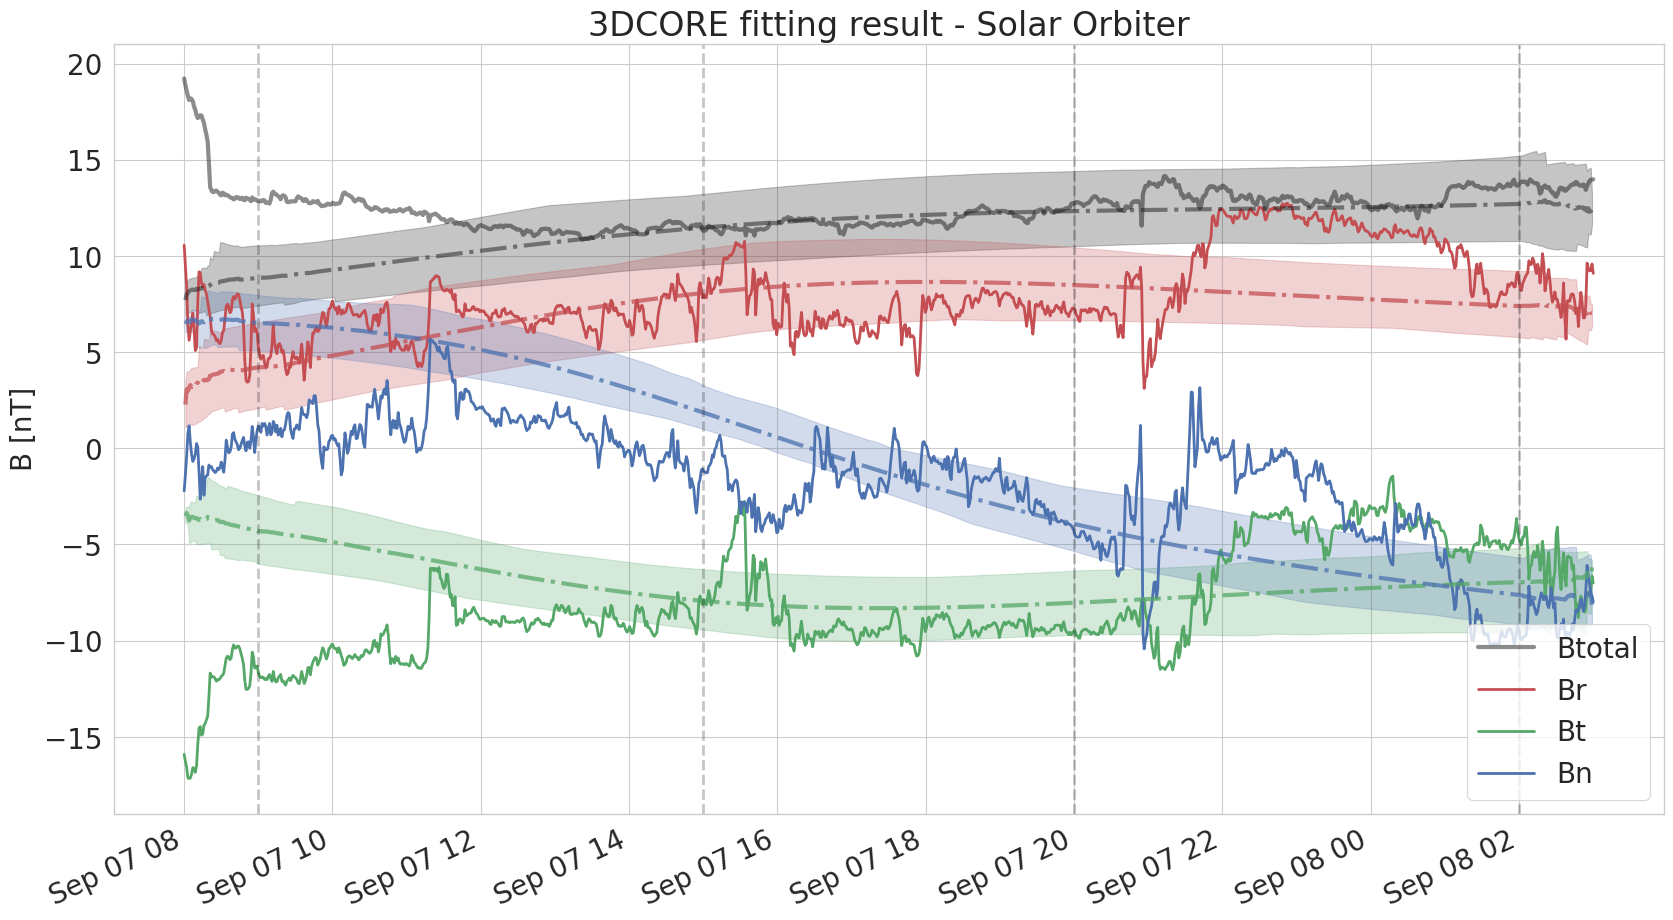

In [70]:
fp.fullinsitu(observer='solo', t_fit=t_fit, start=t_s, end=t_e, filepath=filepath, 
              custom_data='solo_2022sep.p', best=False, ensemble=True, mean=True, save_fig=True, legend=True, fixed=None)

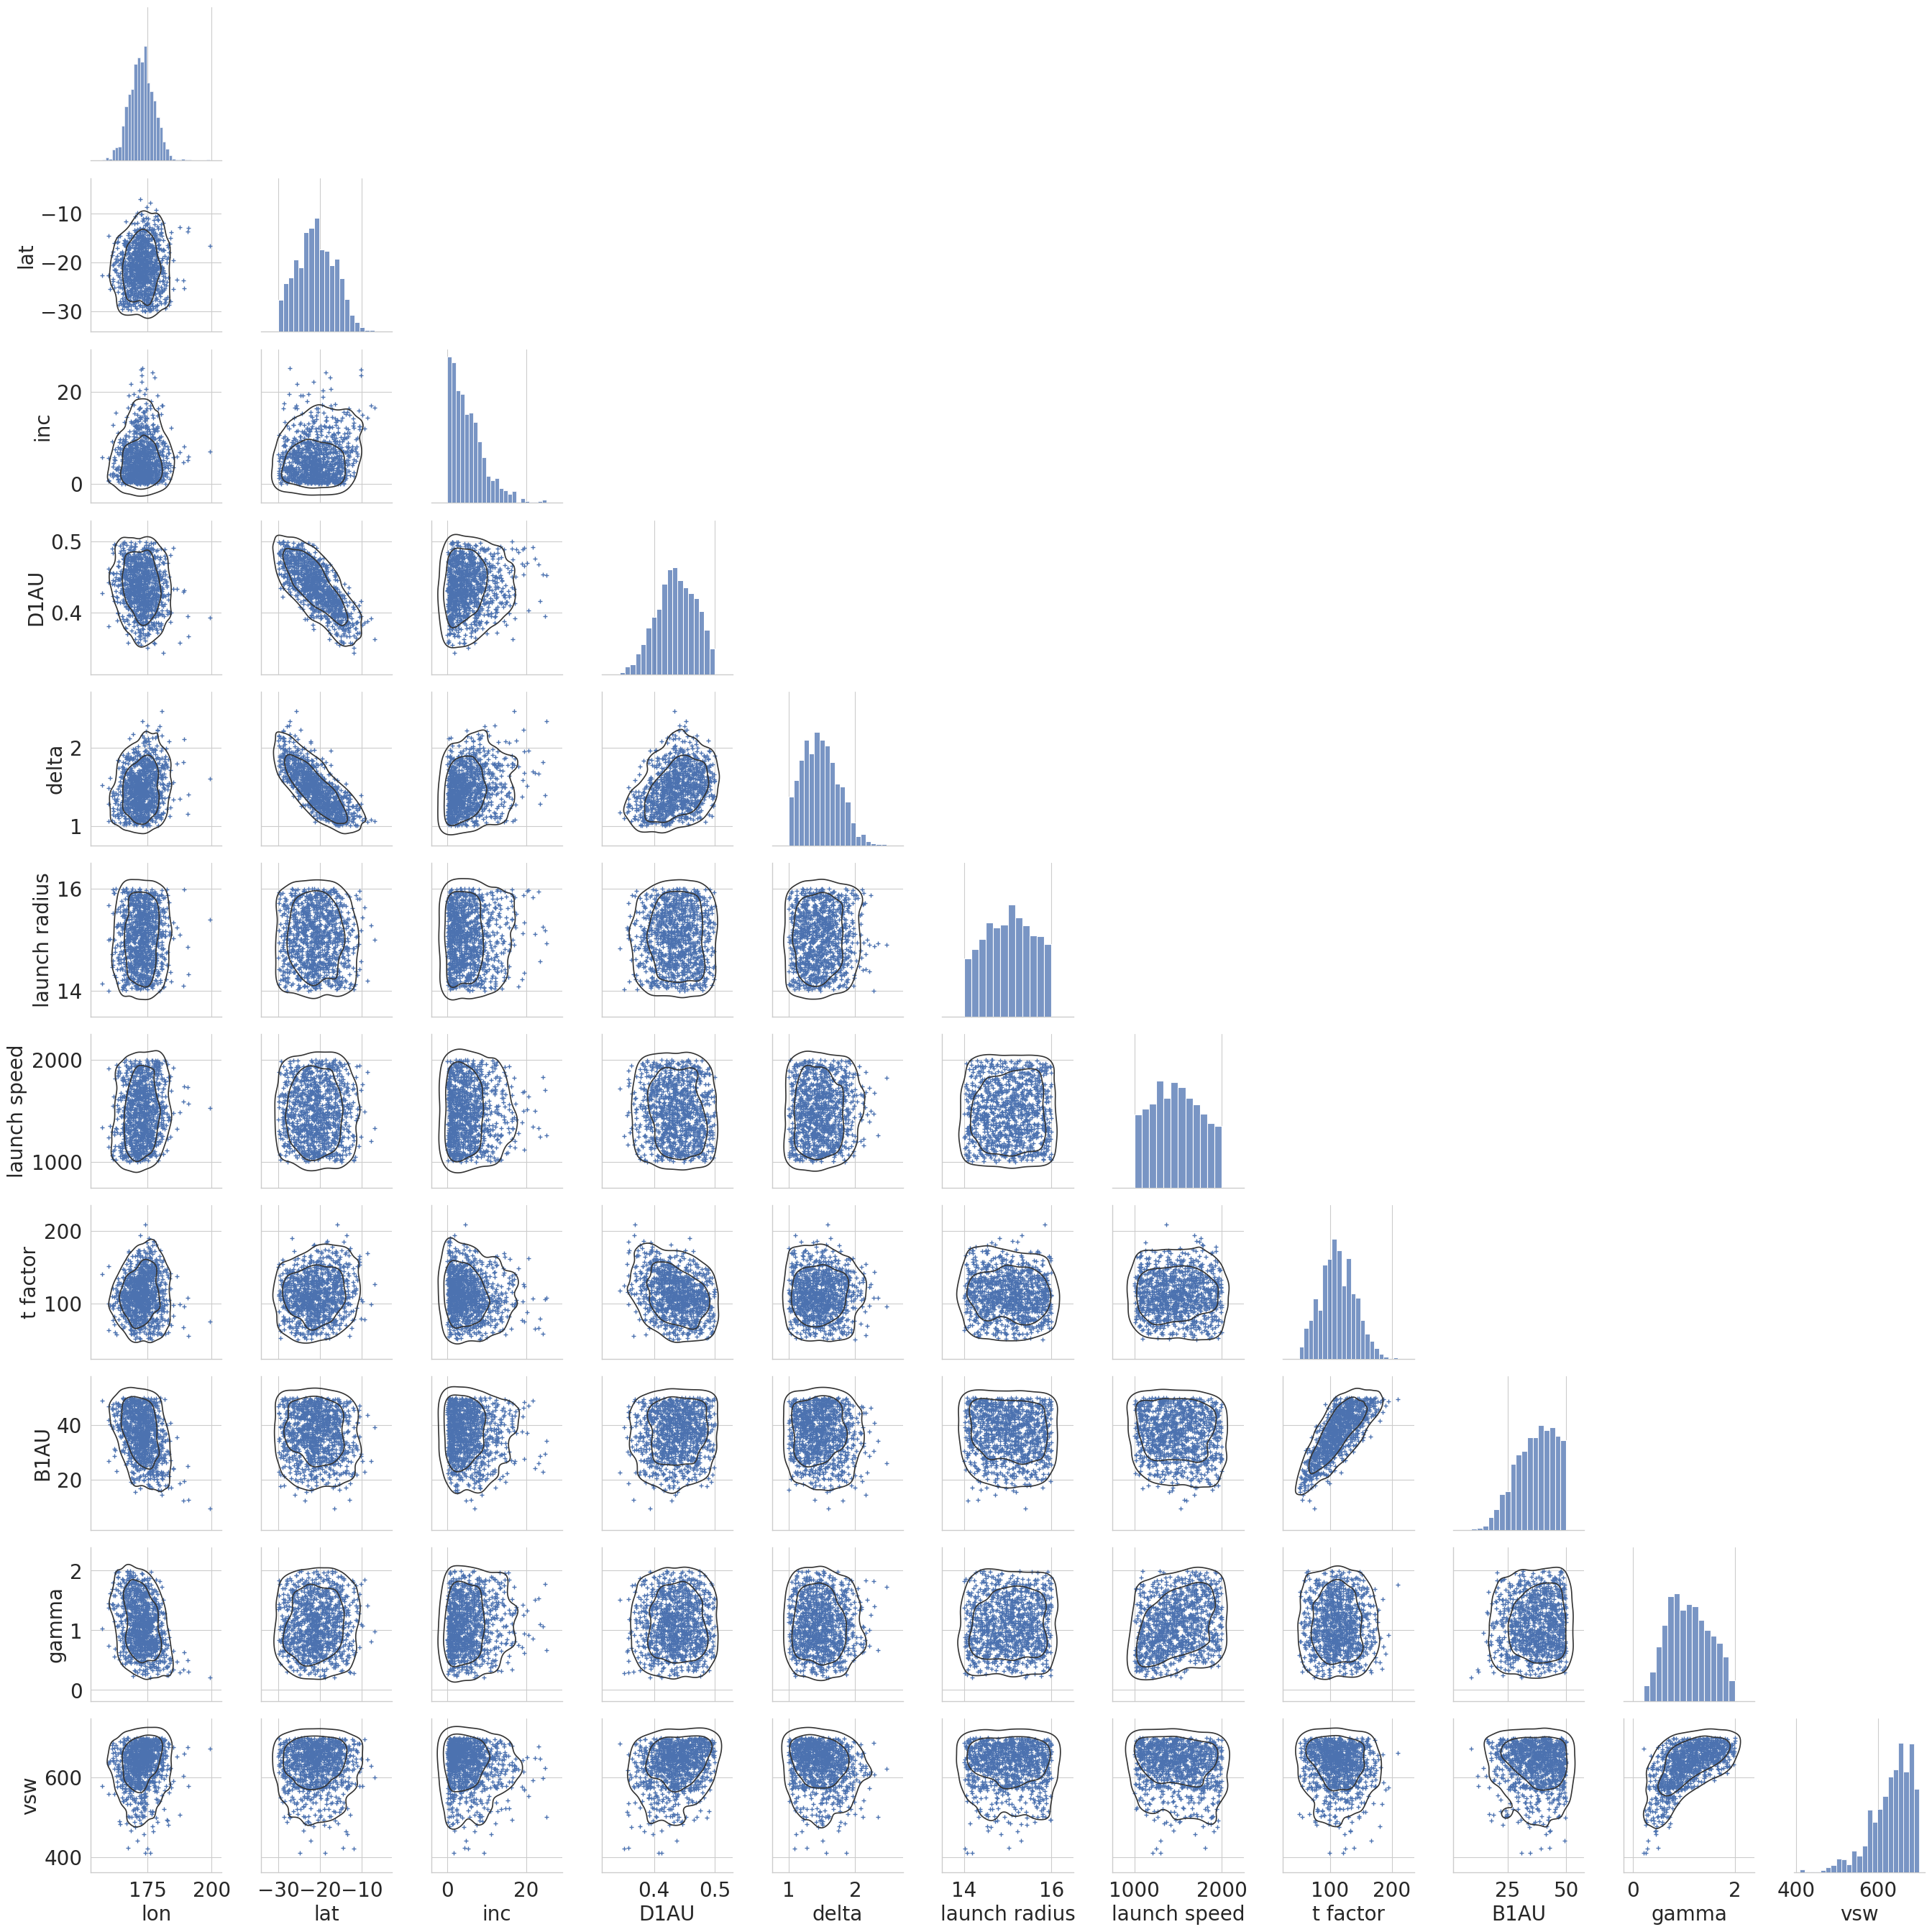

In [43]:
fp.scatterparams(filepath)

In [71]:
print(out['lon'].mean())
print(out['lon'].std())
print(out['launch radius'].std())
print(out['launch speed'].std())

172.78905
4.882709
0.53428584
266.25516


# Plotting the fluxrope and spacecraft positions

In [72]:
overwrite = {
    "cme_longitude": {
            "maximum": out['lon'].mean()+out['lon'].std(),
            "minimum": out['lon'].mean()-out['lon'].std()
        },
    "cme_latitude": {
            "maximum": out['lat'].mean()+out['lat'].std(),
            "minimum": out['lat'].mean()-out['lat'].std()
        },
    "cme_inclination" :{
            "maximum": out['inc'].mean()+out['inc'].std(),
            "minimum": out['inc'].mean()-out['inc'].std()
        },
    "cme_diameter_1au" :{
            "maximum": out['D1AU'].mean()+out['D1AU'].std(),
            "minimum": out['D1AU'].mean()-out['D1AU'].std()
        },
    "cme_aspect_ratio": {
            "maximum": out['delta'].mean()+out['delta'].std(),
            "minimum": out['delta'].mean()-out['delta'].std()
        },
    "cme_launch_radius": {
            "maximum": out['launch radius'].mean()+out['launch radius'].std(),
            "minimum": out['launch radius'].mean()-out['launch radius'].std()
        },
    "cme_launch_velocity": {
            "maximum": out['launch speed'].mean()+out['launch speed'].std(),
            "minimum": out['launch speed'].mean()-out['launch speed'].std()
        },
    "t_factor": {
            "maximum": out['t factor'].mean()+out['t factor'].std(),
            "minimum": out['t factor'].mean()-out['t factor'].std()
        },
    "magnetic_field_strength_1au": {
            "maximum": out['B1AU'].mean()+out['B1AU'].std(),
            "minimum": out['B1AU'].mean()-out['B1AU'].std()
        },
    "background_drag": {
            "maximum": out['gamma'].mean()+out['gamma'].std(),
            "minimum": out['gamma'].mean()-out['gamma'].std()
        },
    "background_velocity": {
            "maximum": out['vsw'].mean()+out['vsw'].std(),
            "minimum": out['vsw'].mean()-out['vsw'].std()
        }
}


In [73]:
n = 1#number of runs

#we initialize model for 1 run with default params

model_obj = py3dcore_h4c.ToroidalModel(t_launch, n, iparams=overwrite)

    Model Parameters
    ================
        For this specific model there are a total of 14 initial parameters which are as follows:
        0: t_i          time offset
        1: lon          longitude
        2: lat          latitude
        3: inc          inclination

        4: dia          cross section diameter at 1 AU
        5: delta        cross section aspect ratio

        6: r0           initial cme radius
        7: v0           initial cme velocity
        8: T            T factor (related to the twist)

        9: n_a          expansion rate
        10: n_b         magnetic field decay rate

        11: b           magnetic field strength at center at 1AU
        12: bg_d        solar wind background drag coefficient
        13: bg_v        solar wind background speed

        There are 4 state parameters which are as follows:
        0: v_t          current velocity
        1: rho_0        torus major radius
        2: rho_1        torus minor radius
        3: b_t          magnetic field strength at center

In [74]:
# after the model has been initialized, we generate a set of random initial parameters according to the table above

model_obj.generator()
#model_obj.update_iparams(iparams_arr, seed=42)


#measurement times 
#tm0 =  t_launch + datetime.timedelta(days=1.5)
tm0 =  datetime.datetime(2022, 9, 7, 8)
tm1 =  t_launch + datetime.timedelta(days=1.7)
tm2 =  t_launch + datetime.timedelta(days=3.5)


#colors for 3dplots

c0 = 'mediumseagreen'
c1 = "xkcd:red"
c2 = "xkcd:blue"


#colors for components in plots
cbt = "xkcd:black"
cbx = "xkcd:magenta"
cby = "xkcd:orange"
cbz = "xkcd:azure"

In [75]:
############# define synthetic satellite positions - point at 0.689 AU (SolO), from -180 to +180 longitude

lonstart = -180
lonstep = 5
lonend = 180

lonend = lonend + lonstep
satpos = np.zeros(len(np.arange(lonstart,lonend,lonstep)),dtype=[('r',float),('lon', float),('lat', float)])
#convert to recarray
satpos = satpos.view(np.recarray)  

##### set position
satpos.r = 0.689
satpos.lon = np.arange(lonstart,lonend,lonstep)
satpos.lat = 0.0

print(satpos[66])

#print(satpos.r, satpos.lon)    

# another satpos definition 
satpos2=cp.deepcopy(satpos)
satpos2.r = 0.064

print(satpos2[1])

# another satpos definition 
satpos3=cp.deepcopy(satpos)
satpos3.r = 1

print(satpos3[36])

(0.689, 150., 0.)
(0.064, -175., 0.)
(1., 0., 0.)


## plot

In [76]:
#model_obj.iparams_arr[0][:]
model_obj.iparams_arr[0][8] = 50

ERROR


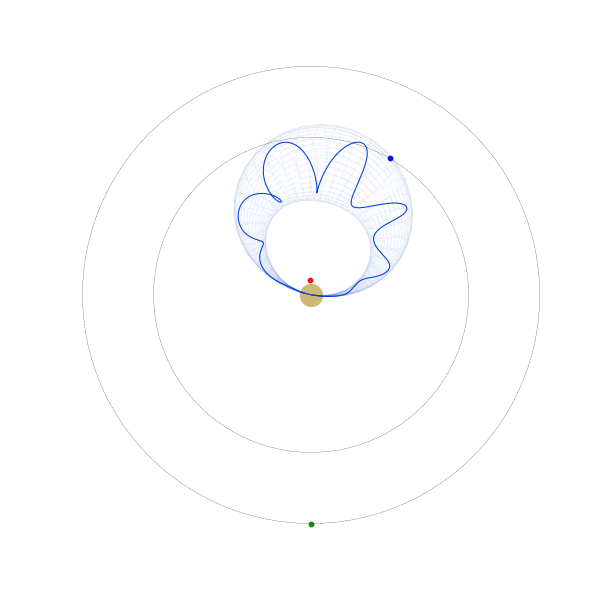

In [77]:
sns.set_context("talk")     

sns.set_style("ticks",{'grid.linestyle': '--'})
fsize=15

fig=plt.figure(1,figsize=(12,9),dpi=70)
ax = fig.add_subplot(111, projection='3d')

fp.plot_configure(ax, view_azim=0, view_elev=90, view_radius=0.8)

fp.plot_3dcore(ax, model_obj, tm1, color=c2)
fp.plot_3dcore_field(ax, model_obj, color=c2, step_size=0.005, lw=1.1, ls="-")
fp.plot_satellite(ax,satpos[66],color='blue',alpha=0.9)
fp.plot_satellite(ax,satpos2[1],color='red',alpha=0.9)
fp.plot_satellite(ax,satpos3[36],color='green',alpha=0.9)


# ax.plot([0,0.689],[0,0],[0,0],ls='-',color='black',lw=0.3)

fp.plot_circle(ax,0.689)
fp.plot_circle(ax,1.0)

plt.tight_layout()


#plt.savefig('results/initial_test.pdf')
#plt.savefig('initial_test.png', dpi=100)

ERROR


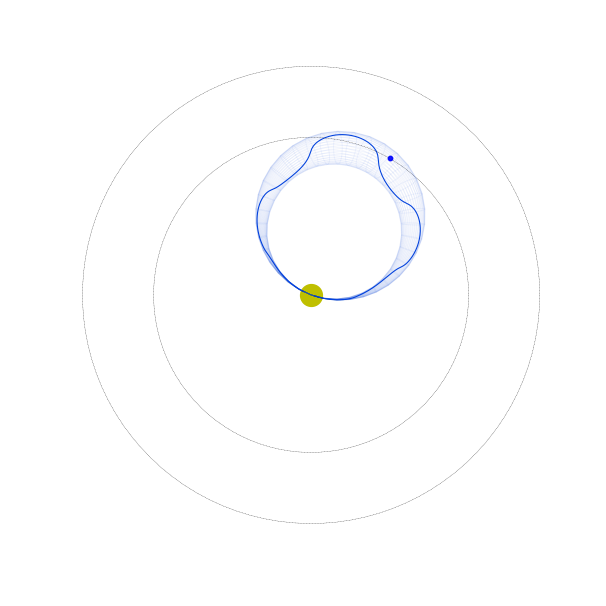

In [33]:

sns.set_style("ticks",{'grid.linestyle': '--'})
fsize=15

fig=plt.figure(1,figsize=(12,9),dpi=70)
ax = fig.add_subplot(111, projection='3d')

fp.plot_configure(ax, view_azim=0, view_elev=90, view_radius=0.8)

fp.plot_3dcore(ax, model_obj, tm0, color=c2)
fp.plot_3dcore_field(ax, model_obj, color=c2, step_size=0.005, lw=1.1, ls="-")
fp.plot_satellite(ax,satpos[66],color='blue',alpha=0.9)


# ax.plot([0,0.689],[0,0],[0,0],ls='-',color='black',lw=0.3)

fp.plot_circle(ax,0.689)
fp.plot_circle(ax,1.0)

plt.tight_layout()


#plt.savefig('results/initial_test.pdf')
#plt.savefig('initial_test.png', dpi=100)

In [ ]:
wf_arr=model_obj.visualize_shape(306, 30)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(*wf_arr.T)
ax.scatter(1,0,0)
ax.set_axis_off()
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.view_init(elev=25, azim=35)